In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [10]:
df= pd.read_csv("Datasets/survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [11]:
df["GENDER"]= df["GENDER"].map({"M":1 , "F":0 })

In [13]:
df["LUNG_CANCER"]=df["LUNG_CANCER"].map({"YES":1, "NO":0})

In [14]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: >

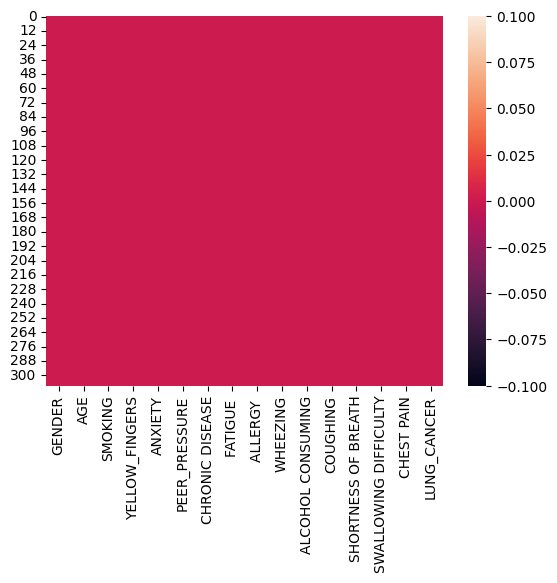

In [ ]:
sns.heatmap(df.isna())

In [16]:
df.groupby('LUNG_CANCER').mean()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,,
0,0.435897,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692
1,0.537037,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593


<Axes: >

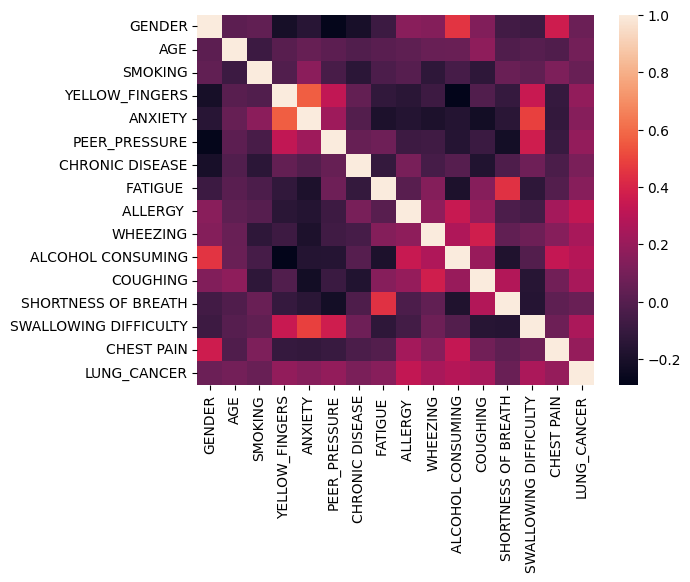

In [17]:
sns.heatmap(df.corr())

In [18]:
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [20]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42)

In [22]:
mymodel = make_pipeline(StandardScaler(),
                        LogisticRegression())
mymodel.fit(X_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [26]:
y_test_predict = mymodel.predict(X_test)
accuracy = accuracy_score(y_test , y_test_predict)
accuracy

0.967741935483871

In [27]:
y_train_predict = mymodel.predict(X_train)
accuracy = accuracy_score(y_train, y_train_predict)
accuracy

0.9271255060728745

In [28]:
import pickle

In [29]:
filename = 'lungs_disease_model.sav'
pickle.dump(mymodel, open(filename, 'wb'))

In [30]:
# loading the saved model
loaded_model = pickle.load(open('lungs_disease_model.sav', 'rb'))